# Imports

In [94]:
import numpy as np
import tensorflow as tf
import keras

import matplotlib.pyplot as plt

In [ ]:
print ('tensorflow: %s' % tf.__version__)
print ('keras: %s' % keras.__version__)

# Diabetes in Pimas Indians

## Loading our data set

Looking at the onset of diabetes in Pimas Indians: https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

In [24]:
# Columns are:
# Number of times pregnant
# Plasma glucose concentration a 2 hours in an oral glucose tolerance test
# Diastolic blood pressure (mm Hg)
# Triceps skin fold thickness (mm)
# 2-Hour serum insulin (mu U/ml)
# Body mass index (weight in kg/(height in m)^2)
# Diabetes pedigree function
# Age (years)
ds = np.loadtxt('pima-indians-diabetes.csv', delimiter=',')

In [25]:
ds

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [26]:
ds.shape

(768, 9)

In [28]:
# Right-most column is the desired output
X_train = ds[0:700, 0:8]
y_train = ds[0:700, 8]

X_test = ds[700:, 0:8]
y_test = ds[700:, 8]

## Defining the Keras model

Models in Keras are defined as a sequence of layers. We create a *Sequential model* and add layers one at a time until we are happy with our network architecture.

The first thing to get right is to ensure the input layer has the right number of input features. This can be specified when creating the first layer with the **input_dim** argument and setting it to 8 for the 8 input variables.

**How do we know the number of layers and their types?**

This is a very hard question. There are heuristics that we can use and often the best network structure is found through a process of trial and error experimentation. Generally, you need a network large enough to capture the structure of the problem.

In this example, we will use a *fully-connected network structure with three layers*.

Fully connected layers are defined using the *Dense class*. We can specify the number of neurons or nodes in the layer as the first argument, and specify the activation function using the **activation** argument.

We will use the *rectified linear unit activation function* referred to as ReLU on the first two layers and the Sigmoid function in the output layer.

It used to be the case that Sigmoid and Tanh activation functions were preferred for all layers. These days, better performance is achieved using the ReLU activation function. We use a sigmoid on the output layer to ensure our network output is between 0 and 1 and easy to map to either a probability of class 1 or snap to a hard classification of either class with a default threshold of 0.5.

We can piece it all together by adding each layer:
    * The model expects rows of data with 8 variables (the input_dim=8 argument).
    * The first hidden layer has 12 nodes and uses the relu activation function.
    * The second hidden layer has 8 nodes and uses the relu activation function.
    * The output layer has one node and uses the sigmoid activation function.

In [29]:
from keras.models import Sequential
from keras.layers import Dense

# Define the keras model
model = Sequential()

#  The following line does two things:
# (1) defines the input with 8 dimensions, aka the visible layer,
# (2) defines the first hidden layer, a ReLU with 12 nodes
model.add(Dense(12, input_dim=8, activation='relu'))
# Add second hidden layer, a ReLU with 8 nodes
model.add(Dense(8, activation='relu'))
# Add output layer, a Sigmoid with 1 node
model.add(Dense(1, activation='sigmoid'))

## Compiling the Keras model

Now that the model is defined, we can compile it.

Compiling the model uses the efficient numerical libraries under the covers (the so-called backend) such as Theano or TensorFlow. The backend automatically chooses the best way to represent the network for training and making predictions to run on your hardware, such as CPU or GPU or even distributed.

When compiling, we must specify some additional properties required when training the network. Remember *training a network means finding the best set of weights to map inputs to outputs in our dataset*.

We must specify the **loss function** to use to evaluate a set of weights, the **optimizer** is used to search through different weights for the network and any optional metrics we would like to collect and report during training.

In this case, we will use **cross entropy** as the loss argument. This loss is for a binary classification problems and is defined in Keras as “**binary_crossentropy**“. For more on loss functions and how to choose a suitable loss function, see: https://machinelearningmastery.com/loss-and-loss-functions-for-training-deep-learning-neural-networks/.

We will define the optimizer as the efficient stochastic gradient descent algorithm “**adam**“. This is a popular version of gradient descent because it automatically tunes itself and gives good results in a wide range of problems. 

Finally, because it is a classification problem, we will collect and report the classification accuracy, defined via the **metrics** argument.

In [30]:
# Compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Fitting the Keras model

We have defined our model and compiled it for efficient computation. Now it's time to execute the model on some data.

We can train or fit our model on our loaded data by calling the **fit()** function on the model.

Training occurs over epochs and each epoch is split into batches.
    * Epoch: One pass through all of the rows in the training dataset.
    * Batch: One or more samples considered by the model within an epoch before weights are updated.
    
One epoch is comprised of one or more batches, based on the chosen batch size and the model is fit for many epochs. 

The training process will run for a fixed number of iterations through the dataset called epochs, that we must specify using the **epochs** argument. We must also set the number of dataset rows that are considered before the model weights are updated within each epoch, called the batch size and set using the **batch_size** argument.

For this problem, we will run for a small number of epochs (150) and use a relatively small batch size of 10.

These configurations can be chosen experimentally by trial and error. We want to train the model enough so that it learns a good (or good enough) mapping of rows of input data to the output classification. The model will always have some error, but the amount of error will level out after some point for a given model configuration. This is called model convergence.

This is where the work happens on your CPU or GPU. No GPU is required for this example.

In [31]:
# Fit the keras model on the dataset
model.fit(X_train, y_train, epochs=200, batch_size=10)

Epoch 1/200
700/700 [==============================] - 0s 345us/step - loss: 2.8362 - accuracy: 0.4900
Epoch 2/200
700/700 [==============================] - 0s 163us/step - loss: 0.9115 - accuracy: 0.5714
Epoch 3/200
700/700 [==============================] - 0s 156us/step - loss: 0.7485 - accuracy: 0.6029
Epoch 4/200
700/700 [==============================] - 0s 169us/step - loss: 0.7041 - accuracy: 0.6486
Epoch 5/200
700/700 [==============================] - 0s 240us/step - loss: 0.6729 - accuracy: 0.6543
Epoch 6/200
700/700 [==============================] - 0s 250us/step - loss: 0.6657 - accuracy: 0.6457
Epoch 7/200
700/700 [==============================] - 0s 165us/step - loss: 0.6604 - accuracy: 0.6600
Epoch 8/200
700/700 [==============================] - 0s 148us/step - loss: 0.6638 - accuracy: 0.6657
Epoch 9/200
700/700 [==============================] - 0s 176us/step - loss: 0.6743 - accuracy: 0.6600
Epoch 10/200
700/700 [==============================] - 0s 145us/step - l

700/700 [==============================] - 0s 241us/step - loss: 0.5299 - accuracy: 0.7457
Epoch 80/200
700/700 [==============================] - 0s 213us/step - loss: 0.5191 - accuracy: 0.7500
Epoch 81/200
700/700 [==============================] - 0s 191us/step - loss: 0.5185 - accuracy: 0.7429
Epoch 82/200
700/700 [==============================] - 0s 256us/step - loss: 0.4986 - accuracy: 0.7686
Epoch 83/200
700/700 [==============================] - 0s 245us/step - loss: 0.5287 - accuracy: 0.7286
Epoch 84/200
700/700 [==============================] - 0s 263us/step - loss: 0.5295 - accuracy: 0.7414
Epoch 85/200
700/700 [==============================] - 0s 227us/step - loss: 0.5287 - accuracy: 0.7486
Epoch 86/200
700/700 [==============================] - 0s 244us/step - loss: 0.5092 - accuracy: 0.7414
Epoch 87/200
700/700 [==============================] - 0s 256us/step - loss: 0.5201 - accuracy: 0.7543
Epoch 88/200
700/700 [==============================] - 0s 183us/step - loss:

700/700 [==============================] - 0s 144us/step - loss: 0.4866 - accuracy: 0.7643
Epoch 158/200
700/700 [==============================] - 0s 139us/step - loss: 0.5062 - accuracy: 0.7429
Epoch 159/200
700/700 [==============================] - 0s 141us/step - loss: 0.4878 - accuracy: 0.7557
Epoch 160/200
700/700 [==============================] - 0s 138us/step - loss: 0.4838 - accuracy: 0.7643
Epoch 161/200
700/700 [==============================] - 0s 144us/step - loss: 0.4835 - accuracy: 0.7557
Epoch 162/200
700/700 [==============================] - 0s 154us/step - loss: 0.4823 - accuracy: 0.7614
Epoch 163/200
700/700 [==============================] - 0s 141us/step - loss: 0.5027 - accuracy: 0.7614
Epoch 164/200
700/700 [==============================] - 0s 136us/step - loss: 0.4861 - accuracy: 0.7557
Epoch 165/200
700/700 [==============================] - 0s 142us/step - loss: 0.4790 - accuracy: 0.7629
Epoch 166/200
700/700 [==============================] - 0s 142us/ste

## Evaluating the Keras model

We have trained our neural network on the entire dataset and we can evaluate the performance of the network on the same dataset.

This will only give us an idea of how well we have modeled the dataset (e.g. train accuracy), but no idea of how well the algorithm might perform on new data. We have done this for simplicity, but ideally, you could separate your data into train and test datasets for training and evaluation of your model.

You can evaluate your model on your training dataset using the **evaluate()** function on your model and pass it the same input and output used to train the model.

This will generate a prediction for each input and output pair and collect scores, including the average loss and any metrics you have configured, such as accuracy.

The evaluate() function will return a list with two values. The first will be the loss of the model on the dataset and the second will be the accuracy of the model on the dataset. We are only interested in reporting the accuracy, so we will ignore the loss value.

In [32]:
# Evaluate the keras model
_, accuracy = model.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

700/700 [==============================] - 0s 55us/step
Accuracy: 77.43


## Using the model to make predictions

Now that the model is trained, how can it be used to make predictions on new data?

We can adapt the above example and use it to generate predictions on the training dataset, pretending it is a new dataset we have not seen before.

Making predictions is as easy as calling the **predict()** function on the model. We are using a sigmoid activation function on the output layer, so the predictions will be a probability in the range between 0 and 1. We can easily convert them into a crisp binary prediction for this classification task by rounding them.

In [33]:
# Make probability predictions with the model and round it
predictions = model.predict(X_test)
rounded = [round(x[0]) for x in predictions]

Alternately, we can call the **predict_classes()** function on the model to predict crisp classes directly, for example:

In [ ]:
# Make class predictions with the model
predictions = model.predict_classes(X_test)

In [60]:
# Store accuracy of model on test set
model_accuracy = np.zeros(len(X_test))

# Compare predictions on our test set with true values
for i in range(len(X_test)):
    if int(predictions[i]) == int(y_test[i]):
        model_accuracy[i] = 1.0

print ('Model accuracy on test set: %.2f' % (100*np.mean(model_accuracy)) )

Model accuracy on test set: 60.29


In [34]:
# Compare predictions (which are on our training set) with true values
for i in range(len(X_test)):
    print('%s => %d (expected %d)' % (X_test[i].tolist(), predictions[i], y_test[i]))

[2.0, 122.0, 76.0, 27.0, 200.0, 35.9, 0.483, 26.0] => 0 (expected 0)
[6.0, 125.0, 78.0, 31.0, 0.0, 27.6, 0.565, 49.0] => 0 (expected 1)
[1.0, 168.0, 88.0, 29.0, 0.0, 35.0, 0.905, 52.0] => 0 (expected 1)
[2.0, 129.0, 0.0, 0.0, 0.0, 38.5, 0.304, 41.0] => 0 (expected 0)
[4.0, 110.0, 76.0, 20.0, 100.0, 28.4, 0.118, 27.0] => 0 (expected 0)
[6.0, 80.0, 80.0, 36.0, 0.0, 39.8, 0.177, 28.0] => 0 (expected 0)
[10.0, 115.0, 0.0, 0.0, 0.0, 0.0, 0.261, 30.0] => 0 (expected 1)
[2.0, 127.0, 46.0, 21.0, 335.0, 34.4, 0.176, 22.0] => 0 (expected 0)
[9.0, 164.0, 78.0, 0.0, 0.0, 32.8, 0.148, 45.0] => 0 (expected 1)
[2.0, 93.0, 64.0, 32.0, 160.0, 38.0, 0.674, 23.0] => 0 (expected 1)
[3.0, 158.0, 64.0, 13.0, 387.0, 31.2, 0.295, 24.0] => 0 (expected 0)
[5.0, 126.0, 78.0, 27.0, 22.0, 29.6, 0.439, 40.0] => 0 (expected 0)
[10.0, 129.0, 62.0, 36.0, 0.0, 41.2, 0.441, 38.0] => 0 (expected 1)
[0.0, 134.0, 58.0, 20.0, 291.0, 26.4, 0.352, 21.0] => 0 (expected 0)
[3.0, 102.0, 74.0, 0.0, 0.0, 29.5, 0.121, 32.0] => 0 (e

# Boston Housing Prices

https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/

The dataset describes 13 numerical properties of houses in Boston suburbs and is concerned with modeling the price of houses in those suburbs in thousands of dollars. As such, this is a regression predictive modeling problem. Input attributes include things like crime rate, proportion of nonretail business acres, chemical concentrations and more.

This is a well-studied problem in machine learning. It is convenient to work with because all of the input and output attributes are numerical and there are 506 instances to work with.

Reasonable performance for models evaluated using Mean Squared Error (MSE) are around 20 in squared thousands of dollars (or $4,500 if you take the square root). This is a nice target to aim for with our neural network model.

We will create a baseline neural network model for the regression problem.

Also check out https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155, which addresses the same dataset and problem using a linear regression.

In [1]:
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Using TensorFlow backend.


## Loading our data set

In [70]:
# Load dataset
df = pd.read_csv('boston_housing.csv', delim_whitespace=True, comment='#')
ds = df.values

df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [17]:
# Split the dataset into input (X) and output (y)
X = ds[:, 0:13]
y = ds[:, 13]

## Defining the Keras base model

We define the function to create the baseline model to be evaluated. It is a simple model that has a single fully connected hidden layer with the same number of neurons as input attributes (13). The network uses good practices such as the rectifier activation function for the hidden layer. No activation function is used for the output layer because it is a regression problem and we are interested in predicting numerical values directly without transform.

The efficient ADAM optimization algorithm is used and a mean squared error loss function is optimized. This will be the same metric that we will use to evaluate the performance of the model. It is a desirable metric because by taking the square root gives us an error value we can directly understand in the context of the problem (thousands of dollars).



In [7]:
# Define the base model
def baseline_model():
    # Create the model
    model = Sequential()
    # Initialize visible and 1 hidden layer
        #  The following line does two things:
        # (1) defines the input with 13 dimensions, aka the visible layer,
        # (2) defines the first hidden layer, a ReLU with 13 nodes
    model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
    # Add output layer with no activation function since we want to predict a numerical value 
    model.add(Dense(1, kernel_initializer='normal'))
    
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

The Keras wrapper object for use in scikit-learn as a regression estimator is called KerasRegressor. We create an instance and pass it both the name of the function to create the neural network model as well as some parameters to pass along to the fit() function of the model later, such as the number of epochs and batch size. Both of these are set to sensible defaults.

The final step is to evaluate this baseline model. We will use 10-fold cross validation to evaluate the model.

## Evaluating the Keras model

In [8]:
# Evaluate the model
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, X, y, cv=kfold)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Baseline: -35.77 (29.51) MSE


Running this code gives us an estimate of the model’s performance on the problem for unseen data.

Note: Your specific results may vary given the stochastic nature of the learning algorithm. Consider running the example a few times and compare the average performance.

Note: The mean squared error is negative because scikit-learn inverts so that the metric is maximized instead of minimized. You can ignore the sign of the result.

The result reports the mean squared error including the average and standard deviation (average variance) across all 10 folds of the cross validation evaluation.

## Standardizing the dataset and re-modeling

An important concern with the Boston house price dataset is that the input attributes all vary in their scales because they measure different quantities.

It is almost always good practice to prepare your data before modeling it using a neural network model.

Continuing on from the above baseline model, we can re-evaluate the same model using a standardized version of the input dataset.

We can use scikit-learn’s Pipeline framework to perform the standardization during the model evaluation process, within each fold of the cross validation. This ensures that there is no data leakage from each testset cross validation fold into the training data.

The code below creates a scikit-learn Pipeline that first standardizes the dataset then creates and evaluate the baseline neural network model.

In [9]:
# Evaluate model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=baseline_model, epochs=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
# Here, n_splits=10 means a 10-fold cross-validation
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, X, y, cv=kfold)
print("Standardized: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Standardized: -28.46 (23.19) MSE


From https://www.openml.org/a/estimation-procedures/1:

Cross-validation is a technique to evaluate predictive models by partitioning the original sample into a training set to train the model, and a test set to evaluate it. 

In k-fold cross-validation, the original sample is randomly partitioned into k equal size subsamples. Of the k subsamples, a single subsample is retained as the validation data for testing the model, and the remaining k-1 subsamples are used as training data. The cross-validation process is then repeated k times (the folds), with each of the k subsamples used exactly once as the validation data. The k results from the folds can then be averaged (or otherwise combined) to produce a single estimation. The advantage of this method is that all observations are used for both training and validation, and each observation is used for validation exactly once.

For classification problems, one typically uses stratified k-fold cross-validation, in which the folds are selected so that each fold contains roughly the same proportions of class labels.

From https://machinelearningmastery.com/k-fold-cross-validation/:

The k value must be chosen carefully for your data sample.

A poorly chosen value for k may result in a mis-representative idea of the skill of the model, such as a score with a high variance (that may change a lot based on the data used to fit the model), or a high bias, (such as an overestimate of the skill of the model).

A value of k=10 is very common in the field of applied machine learning, and is recommend if you are struggling to choose a value for your dataset.

## Tuning the neural network topology

There are many concerns that can be optimized for a neural network model. Perhaps the point of biggest leverage is the structure of the network itself, including the number of layers and the number of neurons in each layer.

### A deeper network topology

One way to improve the performance a neural network is to add more layers. This might allow the model to extract and recombine higher order features embedded in the data.

In this section we will evaluate the effect of adding one more hidden layer to the model. This is as easy as defining a new function that will create this deeper model, copied from our baseline model above. We can then insert a new line after the first hidden layer. In this case with about half the number of neurons.

In [18]:
def larger_model():
    # Create model
    model = Sequential()
    model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(6, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

Our network topology now looks like:
    * 13 inputs -> [13 -> 6] -> 1 output
We can evaluate this network topology in the same way as above, while also using the standardization of the dataset since it was shown to improve performance.

In [19]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=larger_model, epochs=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, X, y, cv=kfold)
print("Larger: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Larger: -22.71 (24.70) MSE


Running this model does show a further improvement in performance from 28 down to 24 thousand squared dollars.

Results may vary with each run, given the stochastic nature of the learning algorithm. Running the example a few times allows for a comparison of the average performance.

### A wider network topology

Another approach to increasing the representational capability of the model is to create a wider network.

In this section we evaluate the effect of keeping a shallow network architecture and nearly doubling the number of neurons in the one hidden layer.

Again, all we need to do is define a new function that creates our neural network model. Here, we have increased the number of neurons in the hidden layer compared to the baseline model from 13 to 20.

In [20]:
def wider_model():
    # Create model
    model = Sequential()
    model.add(Dense(20, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

Our network topology now looks like:

    * 13 inputs -> [20] -> 1 output


In [76]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=wider_model, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, X, y, cv=kfold)
print("Wider: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Wider: -20.94 (23.68) MSE


In [74]:
results

array([-12.2959714 ,  -7.90920733,  -7.05915905, -30.57893436,
       -10.94297035, -15.19929571,  -4.09082723, -87.5626405 ,
       -17.60762339, -22.32831397])

In [75]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

# Multioutput Regression on Random Data

Regression refers to a predictive modeling problem that involves predicting a numerical value.

For example, predicting a size, weight, amount, number of sales, and number of clicks are regression problems. Typically, a single numeric value is predicted given input variables.

Some regression problems require the prediction of two or more numeric values. For example, predicting an x and y coordinate.

These problems are referred to as multiple-output regression, or multioutput regression.

    Regression: Predict a single numeric output given an input.
    Multioutput Regression: Predict two or more numeric outputs given an input.

In multioutput regression, typically the outputs are dependent upon the input and upon each other. This means that often the outputs are not independent of each other and may require a model that predicts both outputs together or each output contingent upon the other outputs.

Multi-step time series forecasting may be considered a type of multiple-output regression where a sequence of future values are predicted and each predicted value is dependent upon the prior values in the sequence.

There are a number of strategies for handling multioutput regression which we will explore here.

In [79]:
from sklearn.datasets import make_regression

# Create random training data set using sklearn's make_regression
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, n_targets=2, random_state=1)

# Random test data set
data_in = [[-2.02220122, 0.31563495, 0.82797464, -0.30620401, 0.16003707, -1.44411381, 0.87616892, -0.50446586, 0.23009474, 0.76201118]]

## Linear Regression, k-Nearest Neighbours

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

# Define and fit model
linreg_model = LinearRegression()
kNN_model = KNeighborsRegressor()

linreg_model.fit(X, y)
linreg_yhat = linreg_model.predict(data_in)

kNN_model.fit(X, y)
kNN_yhat = kNN_model.predict(data_in)

# Summarize prediction
print(linreg_yhat[0])
print(kNN_yhat[0])

[-93.147146    23.26985013]


## Separate Model for Each Output (MultiOutputRegressor)

In [91]:
# example of linear SVR with the MultiOutputRegressor wrapper for multioutput regression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import LinearSVR

# Define model
model = LinearSVR()
wrapper = MultiOutputRegressor(model)

# Fit model
wrapper.fit(X, y)

# Use the model to make predictions
separatemods_yhat = wrapper.predict(data_in)

# Summarize prediction
print(separatemods_yhat[0])

[-93.147146    23.26985013]


# Handwritten Digit Recognition

The MNIST problem is a dataset for evaluating machine learning models on the handwritten digit classification problem: https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/

Images of digits were taken from a variety of scanned documents, normalized in size and centered. Each image is a 28 by 28 pixel square (784 pixels total). A standard split of the dataset is used to evaluate and compare models, where 60,000 images are used to train a model and a separate set of 10,000 images are used to test it.

It is a digit recognition task. As such there are 10 digits (0 to 9) or 10 classes to predict. Excellent results achieve a prediction error of less than 1%. State-of-the-art prediction error of approximately 0.2% can be achieved with large Convolutional Neural Networks.

## Imports and Loading our data set

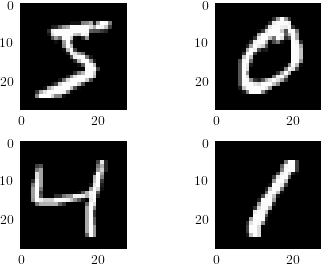

In [95]:
from keras.datasets import mnist

# Load (or download, if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# # Plot ad hoc mnist instances in grayscale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
plt.show()

## Baseline model with multi-layer perceptrons

Do we really need a complex model like a CNN to get the best results with MNIST?

You can get very good results using a very simple neural network model with a single hidden layer. In this section we will create a simple multi-layer perceptron model that achieves an error rate of 1.74%. We will use this as a baseline for comparing more complex CNNs.

In [96]:
# These are already loaded in this notebook:
#from keras.datasets import mnist
#from keras.models import Sequential
#from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

The training dataset is structured as a 3-dimensional array of instance, image width, and image height. For a multi-layer perceptron model we must reduce the images down into a vector of pixels. In this case the 28×28 sized images will be 784 pixel input values.

We can do this transform using the reshape() function on the NumPy array. We can also reduce our memory requirements by forcing the precision of the pixel values to be 32 bit, the default precision used by Keras anyway.m

In [98]:
# Flatten the 28 x 28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')

The pixel values are gray scale between 0 and 255. It is almost always a good idea to perform some scaling of input values when using neural network models. Because the scale is well known and well behaved, we can very quickly normalize the pixel values to the range 0 and 1 by dividing each value by the maximum of 255.

In [99]:
# Normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

Finally, the output variable is an integer from 0 to 9. This is a multi-class classification problem. As such, it is good practice to use a one hot encoding of the class values, transforming the vector of class integers into a binary matrix.

We can easily do this using the built-in np_utils.to_categorical() helper function in Keras.

In [100]:
# One hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [113]:
print (y_train.shape)

print ('\n The training data output has 10 columns, with each column representing the possible output variable integers. A 1 in the column indicates which integer the image is.')

(60000, 10)

 The training data output has 10 columns, with each column representing the possible output variable integers. A 1 in the column indicates which integer the image is.


We are now ready to create our simple neural network model.

The model is a simple neural network with one hidden layer with the same number of neurons as there are inputs (784). A rectifier activation function is used for the neurons in the hidden layer.

A softmax activation function is used on the output layer to turn the outputs into probability-like values and allow one class of the 10 to be selected as the model’s output prediction. Logarithmic loss is used as the loss function (called categorical_crossentropy in Keras) and the efficient ADAM gradient descent algorithm is used to learn the weights.

In [103]:
print (num_pixels, num_classes)

784 10


In [102]:
# Define baseline model
def baseline_model():
    # Create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

The test dataset is used to evaluate the model and a classification error rate is printed.

In [114]:
# Build the model
model = baseline_model()

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 4s - loss: 0.2817 - accuracy: 0.9204 - val_loss: 0.1384 - val_accuracy: 0.9594
Epoch 2/10
 - 4s - loss: 0.1106 - accuracy: 0.9682 - val_loss: 0.0929 - val_accuracy: 0.9709
Epoch 3/10
 - 4s - loss: 0.0706 - accuracy: 0.9793 - val_loss: 0.0763 - val_accuracy: 0.9771
Epoch 4/10
 - 4s - loss: 0.0510 - accuracy: 0.9854 - val_loss: 0.0712 - val_accuracy: 0.9776
Epoch 5/10
 - 4s - loss: 0.0363 - accuracy: 0.9901 - val_loss: 0.0684 - val_accuracy: 0.9782
Epoch 6/10
 - 4s - loss: 0.0255 - accuracy: 0.9933 - val_loss: 0.0596 - val_accuracy: 0.9805
Epoch 7/10
 - 4s - loss: 0.0187 - accuracy: 0.9955 - val_loss: 0.0620 - val_accuracy: 0.9805
Epoch 8/10
 - 4s - loss: 0.0148 - accuracy: 0.9967 - val_loss: 0.0615 - val_accuracy: 0.9801
Epoch 9/10
 - 4s - loss: 0.0100 - accuracy: 0.9983 - val_loss: 0.0668 - val_accuracy: 0.9797
Epoch 10/10
 - 4s - loss: 0.0084 - accuracy: 0.9984 - val_loss: 0.0607 - val_accuracy: 0.9824
Baseline Error: 1.7

In [115]:
model.metrics_names

['loss', 'accuracy']

## Simple CNN for MNIST

We can also develop a more sophisticated convolutional neural network or CNN model. In this section we will create a simple CNN for MNIST that demonstrates how to use all of the aspects of a modern CNN implementation, including Convolutional layers, Pooling layers and Dropout layers.

In [116]:
#from keras.datasets import mnist
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
#from keras.utils import np_utils

We need to load the MNIST dataset and reshape it so that it is suitable for use training a CNN. In Keras, the layers used for two-dimensional convolutions expect pixel values with the dimensions [pixels][width][height][channels].

Note, we are forcing so-called channels-last ordering for consistency in this example.

In the case of RGB, the last dimension pixels would be 3 for the red, green and blue components and it would be like having 3 image inputs for every color image. In the case of MNIST where the pixel values are gray scale, the pixel dimension is set to 1.

In [123]:
# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print (X_train.shape[0], X_test.shape[0])

# Reshape to be [samples][width][height][channels]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')


# Normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# One hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

60000 10000


Next we define our neural network model.

Convolutional neural networks are more complex than standard multi-layer perceptrons, so we will start by using a simple structure to begin with that uses all of the elements for state of the art results. Below summarizes the network architecture.

    1. The first hidden layer is a convolutional layer called a Convolution2D. The layer has 32 feature maps, which with the size of 5×5 and a rectifier activation function. This is the input layer, expecting images with the structure outline above [pixels][width][height].
    2. Next we define a pooling layer that takes the max called MaxPooling2D. It is configured with a pool size of 2×2.
    3. The next layer is a regularization layer using dropout called Dropout. It is configured to randomly exclude 20% of neurons in the layer in order to reduce overfitting.
    4. Next is a layer that converts the 2D matrix data to a vector called Flatten. It allows the output to be processed by standard fully connected layers.
    5. Next a fully connected layer with 128 neurons and rectifier activation function.
    6. Finally, the output layer has 10 neurons for the 10 classes and a softmax activation function to output probability-like predictions for each class.
As before, the model is trained using logarithmic loss and the ADAM gradient descent algorithm.

In [124]:
def baseline_model():
    # Create model
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [126]:
# Build the model
model = baseline_model()

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 21s - loss: 0.2377 - accuracy: 0.9319 - val_loss: 0.0714 - val_accuracy: 0.9780
Epoch 2/10
 - 24s - loss: 0.0687 - accuracy: 0.9798 - val_loss: 0.0475 - val_accuracy: 0.9846
Epoch 3/10
 - 27s - loss: 0.0502 - accuracy: 0.9848 - val_loss: 0.0459 - val_accuracy: 0.9855
Epoch 4/10
 - 21s - loss: 0.0380 - accuracy: 0.9887 - val_loss: 0.0402 - val_accuracy: 0.9852
Epoch 5/10
 - 21s - loss: 0.0331 - accuracy: 0.9903 - val_loss: 0.0336 - val_accuracy: 0.9891
Epoch 6/10
 - 20s - loss: 0.0275 - accuracy: 0.9912 - val_loss: 0.0352 - val_accuracy: 0.9885
Epoch 7/10
 - 21s - loss: 0.0221 - accuracy: 0.9932 - val_loss: 0.0374 - val_accuracy: 0.9868
Epoch 8/10
 - 20s - loss: 0.0193 - accuracy: 0.9941 - val_loss: 0.0318 - val_accuracy: 0.9889
Epoch 9/10
 - 20s - loss: 0.0149 - accuracy: 0.9953 - val_loss: 0.0308 - val_accuracy: 0.9908
Epoch 10/10
 - 20s - loss: 0.0137 - accuracy: 0.9955 - val_loss: 0.0356 - val_accuracy: 0.9891
CNN Error